In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# data
mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(55000, 10)


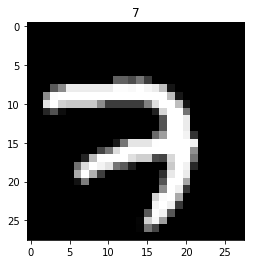

In [3]:
# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

In [4]:
# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP * INPUT_SIZE])       # shape(batch, 784)
image = tf.reshape(tf_x, [-1, TIME_STEP, INPUT_SIZE])                   # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])                             # input y


In [5]:
# RNN
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)
outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    image,                      # input
    initial_state=None,         # the initial hidden state
    dtype=tf.float32,           # must given if set initial_state = None
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)
output = tf.layers.dense(outputs[:, -1, :], 10)              # output based on the last output step

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(1200):    # training
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:      # testing
        accuracy_ = sess.run(accuracy, {tf_x: test_x, tf_y: test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

# print 10 predictions from test data
test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
train loss: 2.3271 | test accuracy: 0.14
train loss: 0.8738 | test accuracy: 0.42
train loss: 0.6092 | test accuracy: 0.52
train loss: 0.5410 | test accuracy: 0.61
train loss: 0.2980 | test accuracy: 0.67
train loss: 0.1168 | test accuracy: 0.71
train loss: 0.2815 | test accuracy: 0.74
train loss: 0.1086 | test accuracy: 0.76
train loss: 0.1291 | test accuracy: 0.78
train loss: 0.4986 | test accuracy: 0.80
train loss: 0.1088 | test accuracy: 0.81
train loss: 0.2132 | test accuracy: 0.82
train loss: 0.1047 | test accuracy: 0.83
train loss: 0.3908 | test accuracy: 0.84
train loss: 0.0466 | test accuracy: 0.85
train loss: 0.2457 | test accuracy: 0.85
train loss: 0.1477 | test accuracy: 0.86
train loss: 0.1655 | test accuracy: 0.87
train loss: 0.3025 | test accu